# Bank Customers Churn Prediction

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. We are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the *F1*-measure on the test set yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.


Data: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Library import and data review

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve  

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Churn.csv")

In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


*Target* Exited — the fact that client has left. We will solve the problem by classification methods.

In [8]:
data['tenure'] = data['tenure'].fillna(-1)

In [9]:
# drop columns with individual user characteristics
data.drop(["rownumber", "customerid", "surname"], axis=1, inplace=True)

In [10]:
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

**Onehot encoding**

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Splitting data into samples: training, validation, test**

In [13]:
features = data.drop('exited', axis=1)
target = data['exited']

In [14]:
features_train, features_test0, target_train, target_test0 = train_test_split(features, target, 
                                                                              test_size=0.4, 
                                                                              random_state=1)

In [15]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test0, target_test0, 
                                                                              test_size=0.5, 
                                                                              random_state=1)

In [16]:
print(features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape, target_test.shape)


(6000, 11) (6000,) (2000, 11) (2000,) (2000, 11) (2000,)


- Train - 60% (`features_train`, `target_train`)
- Valid - 20% (`features_valid`, `target_valid`)
- Test - 20% (`features_test`,`target_test`)

 **Scaling**

In [17]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

In [18]:
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])

In [19]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [20]:
features_test[numeric] = scaler.transform(features_test[numeric])

## Model

DecisionTreeClassifier, RandomForestClassifier, LogisticRegression

In [21]:
model_dtc = DecisionTreeClassifier(random_state=123)
model_dtc.fit(features_train, target_train)
predictions_dtc = model_dtc.predict(features_valid)

print("Accuracy:", accuracy_score(predictions_dtc, target_valid))
print("F1:", f1_score(predictions_dtc, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predictions_dtc))

Accuracy: 0.779
F1: 0.48842592592592593
AUC-ROC: 0.6771296063686238


In [22]:
model_rfc = RandomForestClassifier(random_state=123)

param_grid = { 
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['log2'],
    'max_depth' : [5,7,9,11,13,15],
    'criterion' : ['gini']
}

CV_rfc = GridSearchCV(estimator=model_rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(features_train, target_train)


predictions_rfc = CV_rfc.best_estimator_.predict(features_valid)
print("accuracy:", accuracy_score(predictions_rfc, target_valid))
print("F1:", f1_score(predictions_rfc, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predictions_rfc))

accuracy: 0.865
F1: 0.5794392523364486
AUC-ROC: 0.7098196489254


In [23]:
model_lgr = LogisticRegression(solver = 'liblinear')
model_lgr.fit(features_train, target_train)

predictions_lgr = model_lgr.predict(features_valid)

print("Accuracy:", accuracy_score(predictions_lgr, target_valid))
print("F1:", f1_score(predictions_lgr, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predictions_lgr))

Accuracy: 0.8105
F1: 0.3315696649029982
AUC-ROC: 0.5951728370732853


Accuracy and F1-score:
- decision tree 0.779 and 0.488
- random forest 0.865 and 0.579
- logistic regression 0.805 and 0.331

The random forest model has the highest performance.

## Imbalance

In [24]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [25]:
target_valid.value_counts(normalize = 1)

0    0.7895
1    0.2105
Name: exited, dtype: float64

There is a noticeable class imbalance in the training and validation samples (0 ≈ 80%, 1 ≈ 20%)

**Upsampling**

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, 4)

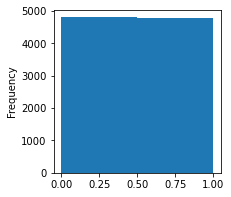

In [27]:
target_upsampled_train.plot(kind ='hist', bins=2, figsize=(3, 3))
plt.show()

In [28]:
CV_rfc = GridSearchCV(estimator=model_rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(features_upsampled_train, target_upsampled_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'max_features': ['log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [29]:
predictions = CV_rfc.best_estimator_.predict(features_valid)


print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predictions))

Accuracy: 0.8425
F1: 0.6067415730337079
AUC-ROC: 0.7452166875514283


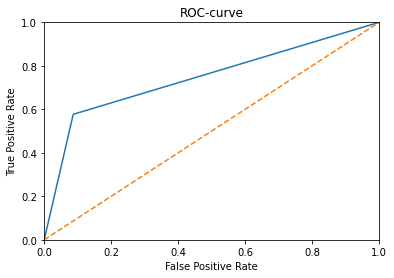

In [30]:
fpr, tpr, thresholds = roc_curve(target_valid, predictions) 
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

**Downsampling**

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=123)
    
    return features_downsampled, target_downsampled

In [32]:
features_downsampled_train, target_downsampled_train = downsample(features_train, 
                                                                  target_train, 
                                                                  fraction=0.1)


In [33]:
CV_rfc_down = GridSearchCV(estimator=model_rfc, param_grid=param_grid, cv=5)
CV_rfc_down.fit(features_downsampled_train, target_downsampled_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'max_features': ['log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [34]:
predictions = CV_rfc_down.best_estimator_.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predictions))

Accuracy: 0.563
F1: 0.47094430992736086
AUC-ROC: 0.6953708035543708


Training the Random forest model on a balanced sample (upsampling technique) led to an increase in metrics. Next, we test the model on a test set.

## Test

In [35]:
predictions = CV_rfc.best_estimator_.predict(features_test)
print("Accuracy:", accuracy_score(predictions, target_test))
print("F1:", f1_score(predictions, target_test))
print("AUC-ROC:", roc_auc_score(target_test, predictions))

Accuracy: 0.852
F1: 0.6105263157894737
AUC-ROC: 0.7420132610006027


## Conclusions

- Conducted data preparation: removed unnecessary features, filled in gaps, scaled numerical features, applied the OHE technique for categorical features
- Research three models. The most accurate was the random forest model with the metric F1=0.58
- Identified an imbalance of classes 80/20 (negative/positive). We made upsampling of a positive class, thanks to which we managed to increase F1 to 0.61. Dowmsampling proved to be less efficient.
- Checking on the test sample showed that the model trained on upsampling data shows: accuracy 0.852, F1 0.61, AUC-ROC 0.74